https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate

In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')

In [3]:
train

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE


In [4]:
train['CreationDate'] = pd.to_datetime(train['CreationDate'])

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            45000 non-null  int64         
 1   Title         45000 non-null  object        
 2   Body          45000 non-null  object        
 3   Tags          45000 non-null  object        
 4   CreationDate  45000 non-null  datetime64[ns]
 5   Y             45000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.1+ MB


# Dataset creation for training

In [6]:
train_concat = pd.DataFrame()
train_concat["text"] = train['Title'] + ' ' + train['Body']
train_concat["Y"] = train['Y']

In [7]:
train_concat

,text,Y
0,Java: Repeat Task Every Random Seconds <p>I'm ...,LQ_CLOSE
1,Why are Java Optionals immutable? <p>I'd like ...,HQ
2,Text Overlay Image with Darkened Opacity React...,HQ
3,Why ternary operator in swift is so picky? <p>...,HQ
4,hide/show fab with scale animation <p>I'm usin...,HQ
...,...,...
44995,Convert List<String> to string C# - asp.net - ...,LQ_CLOSE
44996,Does Python execute code from the top or botto...,LQ_CLOSE
44997,how to change payment date in Azure? <p>It loo...,LQ_CLOSE
44998,how to implement fill in the blank in Swift <p...,LQ_CLOSE


In [8]:
valid_concat = pd.DataFrame()
valid_concat["text"] = valid['Title'] + ' ' + valid['Body']
valid_concat["Y"] = valid['Y']

# Preprocessing

In [9]:
import string
import nltk
import re
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def removeURL(inputText):
    return re.sub(r"http\S+", "", inputText)

In [11]:
def removeHTML(inputText):
    return BeautifulSoup(inputText, "lxml").get_text()

In [12]:
def removePunctuation(inputText):
    return inputText.translate(str.maketrans('', '', string.punctuation))   

In [13]:
stopwords = stopwords.words('english')
def removeStopwords(inputTokens):
    output_tokens = []
    for token in inputTokens:
        if token not in stopwords:
            output_tokens.append(token)
    return output_tokens

In [14]:
def porterStemming(inputTokens):
    porter = PorterStemmer()
    output_tokens = []
    for token in inputTokens:
        output_tokens.append(porter.stem(token))
    return output_tokens

In [15]:
def lemmatisation(inputTokens):
    wnl = WordNetLemmatizer()
    output_tokens = []
    for token in inputTokens:
        output_tokens.append(wnl.lemmatize(token))
    return output_tokens

In [16]:
def preprocess(text):
    text = removeURL(text)
    text = removeHTML(text)
    text=removePunctuation(text)
    tokens = word_tokenize(text)
    tokens=removeStopwords(tokens)
    tokens=lemmatisation(tokens)
    tokens=porterStemming(tokens)    
    return " ".join(tokens)

In [17]:
# Testing preprocess function on sample text
mytext = "<b>Hey there!</b> log in to https://www.google.com/ .&amp;  Here it is, are you seeing this? Test corpora"

preprocess(mytext)

'hey log here see test corpu'

In [18]:
# Preprocess Train and validation data

In [19]:
train_concat['text'] = np.vectorize(preprocess)(train_concat['text'].to_numpy())

In [20]:
train_concat

,text,Y
0,java repeat task everi random second im alread...,LQ_CLOSE
1,whi java option immut id like understand java ...,HQ
2,text overlay imag darken opac react nativ i at...,HQ
3,whi ternari oper swift picki the question simp...,HQ
4,hideshow fab scale anim im use custom floating...,HQ
...,...,...
44995,convert list string c aspnet sql server i new ...,LQ_CLOSE
44996,doe python execut code top bottom script i wor...,LQ_CLOSE
44997,chang payment date azur it look like cost 8 da...,LQ_CLOSE
44998,implement fill blank swift i question i want i...,LQ_CLOSE


In [21]:
valid_concat['text'] = np.vectorize(preprocess)(valid_concat['text'].to_numpy())

In [22]:
valid_concat

,text,Y
0,how get child record differ tabl base given pa...,LQ_EDIT
1,retriev except data anoth tabl i two tabl mmas...,LQ_EDIT
2,panda readhtml im tri extract us state wiki ur...,HQ
3,reader alway gim null im new c i wan na make a...,LQ_EDIT
4,php rearrang array element base condit basic a...,LQ_EDIT
...,...,...
14995,how i align two flex box follow i menu id like...,LQ_CLOSE
14996,c the correct way multipli integ doubl i tri m...,LQ_CLOSE
14997,whi django is show me thi error when i tri to ...,LQ_EDIT
14998,php get content php page i control insid serve...,LQ_CLOSE


#  Feature and Labels

In [39]:
X_train = train_concat['text']
y_train = train_concat['Y']

In [40]:
X_train

0        java repeat task everi random second im alread...
1        whi java option immut id like understand java ...
2        text overlay imag darken opac react nativ i at...
3        whi ternari oper swift picki the question simp...
4        hideshow fab scale anim im use custom floating...
                               ...                        
44995    convert list string c aspnet sql server i new ...
44996    doe python execut code top bottom script i wor...
44997    chang payment date azur it look like cost 8 da...
44998    implement fill blank swift i question i want i...
44999    how i make c applic outsid visual studio im ne...
Name: text, Length: 45000, dtype: object

In [41]:
X_valid = valid_concat['text']
y_valid = valid_concat['Y']

In [42]:
X_valid

0        how get child record differ tabl base given pa...
1        retriev except data anoth tabl i two tabl mmas...
2        panda readhtml im tri extract us state wiki ur...
3        reader alway gim null im new c i wan na make a...
4        php rearrang array element base condit basic a...
                               ...                        
14995    how i align two flex box follow i menu id like...
14996    c the correct way multipli integ doubl i tri m...
14997    whi django is show me thi error when i tri to ...
14998    php get content php page i control insid serve...
14999    whi cant overload function vari return type so...
Name: text, Length: 15000, dtype: object

# Count Vectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vectorizer = CountVectorizer()

X_train_transformed = vectorizer.fit_transform(X_train)
# print(vectorizer.get_feature_names())

print(X_train_transformed.shape)

(45000, 333220)


# Training

In [45]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [33]:
%%time
svm_clf = svm.SVC()
svm_clf.fit(X_train_transformed,y_train)

Wall time: 29min 31s


SVC()

In [46]:
logistic_clf = LogisticRegression(random_state=0).fit(X_train_transformed, y_train)

C:\Users\utkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train_transformed, y_train)

MultinomialNB()

In [57]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [61]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [31]:
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [59]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_transformed, y_train)

C:\Users\utkar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Validation

In [52]:
X_valid_transformed = vectorizer.transform(X_valid)
X_valid_transformed

<15000x333220 sparse matrix of type '<class 'numpy.int64'>'
	with 550560 stored elements in Compressed Sparse Row format>

In [91]:
# print("Accuracy svm_clf      :",metrics.accuracy_score(y_valid, svm_clf.predict(X_valid_transformed)))
# print("Accuracy kn_clf       :",metrics.accuracy_score(y_valid, kn_clf.predict(X_valid_transformed)))


print("Accuracy logistic_clf :",metrics.accuracy_score(y_valid, logistic_clf.predict(X_valid_transformed)))
print("Accuracy mnb_clf      :",metrics.accuracy_score(y_valid, mnb_clf.predict(X_valid_transformed)))
print("Accuracy rf_clf       :",metrics.accuracy_score(y_valid, rf_clf.predict(X_valid_transformed)))
print("Accuracy dt_clf       :",metrics.accuracy_score(y_valid, dt_clf.predict(X_valid_transformed)))
print("Accuracy xgb_clf      :",metrics.accuracy_score(y_valid, xgb_clf.predict(X_valid_transformed)))

Accuracy logistic_clf : 0.6522666666666667
Accuracy mnb_clf      : 0.633
Accuracy rf_clf       : 0.6408666666666667
Accuracy dt_clf       : 0.5184
Accuracy xgb_clf      : 0.6654666666666667


# Performance of different models

In [81]:
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve,classification_report
from sklearn import metrics

In [72]:
def plot_cm(clf, testX, testY, name):
    plot_confusion_matrix(clf, testX, testY)
    plt.title(f"{name}:Confusion Matrix")

              precision    recall  f1-score   support

          HQ       0.80      0.77      0.78      5000
    LQ_CLOSE       0.55      0.61      0.58      5000
     LQ_EDIT       0.62      0.58      0.60      5000

    accuracy                           0.65     15000
   macro avg       0.66      0.65      0.65     15000
weighted avg       0.66      0.65      0.65     15000



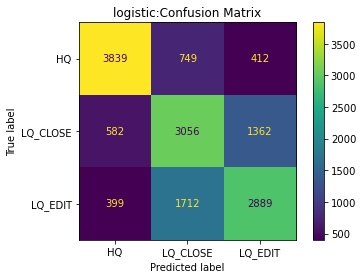

In [85]:
print(classification_report(y_valid, logistic_clf.predict(X_valid_transformed)))
plot_cm(logistic_clf, X_valid_transformed, y_valid,'logistic')

              precision    recall  f1-score   support

          HQ       0.67      0.87      0.76      5000
    LQ_CLOSE       0.56      0.56      0.56      5000
     LQ_EDIT       0.66      0.47      0.55      5000

    accuracy                           0.63     15000
   macro avg       0.63      0.63      0.62     15000
weighted avg       0.63      0.63      0.62     15000



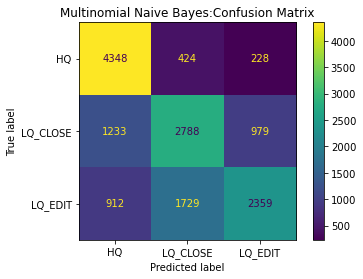

In [86]:
print(classification_report(y_valid, mnb_clf.predict(X_valid_transformed)))
plot_cm(mnb_clf, X_valid_transformed, y_valid,'Multinomial Naive Bayes')

              precision    recall  f1-score   support

          HQ       0.77      0.76      0.76      5000
    LQ_CLOSE       0.53      0.66      0.59      5000
     LQ_EDIT       0.65      0.50      0.57      5000

    accuracy                           0.64     15000
   macro avg       0.65      0.64      0.64     15000
weighted avg       0.65      0.64      0.64     15000



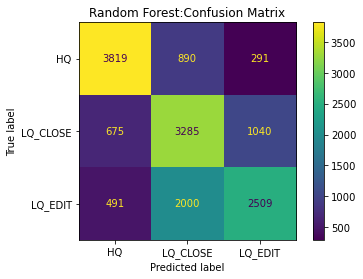

In [87]:
print(classification_report(y_valid, rf_clf.predict(X_valid_transformed)))
plot_cm(rf_clf, X_valid_transformed, y_valid,'Random Forest')

              precision    recall  f1-score   support

          HQ       0.61      0.61      0.61      5000
    LQ_CLOSE       0.45      0.46      0.46      5000
     LQ_EDIT       0.50      0.48      0.49      5000

    accuracy                           0.52     15000
   macro avg       0.52      0.52      0.52     15000
weighted avg       0.52      0.52      0.52     15000



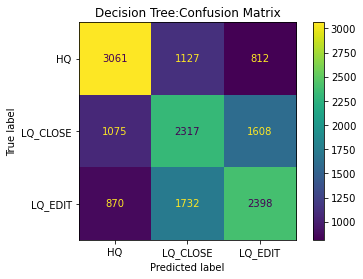

In [88]:
print(classification_report(y_valid, dt_clf.predict(X_valid_transformed)))
plot_cm(dt_clf, X_valid_transformed, y_valid,'Decision Tree')

              precision    recall  f1-score   support

          HQ       0.78      0.78      0.78      5000
    LQ_CLOSE       0.58      0.61      0.60      5000
     LQ_EDIT       0.64      0.60      0.62      5000

    accuracy                           0.67     15000
   macro avg       0.67      0.67      0.67     15000
weighted avg       0.67      0.67      0.67     15000



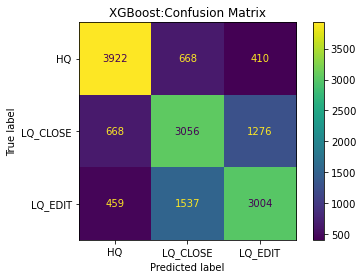

In [89]:
print(classification_report(y_valid, xgb_clf.predict(X_valid_transformed)))
plot_cm(xgb_clf, X_valid_transformed, y_valid,'XGBoost')